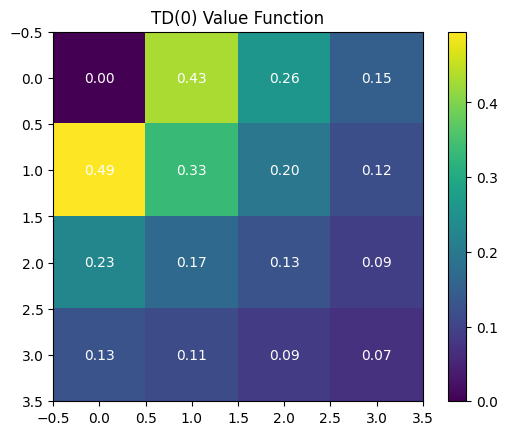

In [1]:
# temoporal distance learning random 
import numpy as np
import matplotlib.pyplot as plt

# Gridworld configuration
GRID_SIZE = 4
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_TO_DELTA = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
GAMMA = 0.9
ALPHA = 0.1
EPISODES = 5000

NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = len(ACTIONS)

# Convert state index to (x, y) coordinates
def state_to_xy(s):
    return divmod(s, GRID_SIZE)

# Convert (x, y) coordinates to state index
def xy_to_state(x, y):
    return x * GRID_SIZE + y

# Terminal state setup
GOAL_STATE = xy_to_state(0, 0)
REWARDS = np.zeros(NUM_STATES)
REWARDS[GOAL_STATE] = 1.0
TERMINAL_STATES = [GOAL_STATE]

# Environment dynamics
def get_next_state(s, a):
    if s in TERMINAL_STATES:
        return s
    x, y = state_to_xy(s)
    dx, dy = ACTION_TO_DELTA[a]
    nx, ny = np.clip(x + dx, 0, GRID_SIZE - 1), np.clip(y + dy, 0, GRID_SIZE - 1)
    return xy_to_state(nx, ny)

# TD(0) learning with random policy
def td_learning():
    V = np.zeros(NUM_STATES)
    for episode in range(EPISODES):
        s = np.random.randint(NUM_STATES)
        while s not in TERMINAL_STATES:
            a = np.random.choice(ACTIONS)
            s_ = get_next_state(s, a)
            r = REWARDS[s_]
            V[s] += ALPHA * (r + GAMMA * V[s_] - V[s])
            s = s_
    return V

# Plotting the value function as a grid
def plot_value_function(V, title="TD(0) Value Function"):
    V_grid = V.reshape(GRID_SIZE, GRID_SIZE)
    fig, ax = plt.subplots()
    im = ax.imshow(V_grid, cmap='viridis', origin='upper')
    for s in range(NUM_STATES):
        x, y = state_to_xy(s)
        ax.text(y, x, f"{V[s]:.2f}", ha='center', va='center', color='white')
    ax.set_title(title)
    plt.colorbar(im)
    plt.show()

# Run TD learning and visualize
V_td = td_learning()
plot_value_function(V_td)

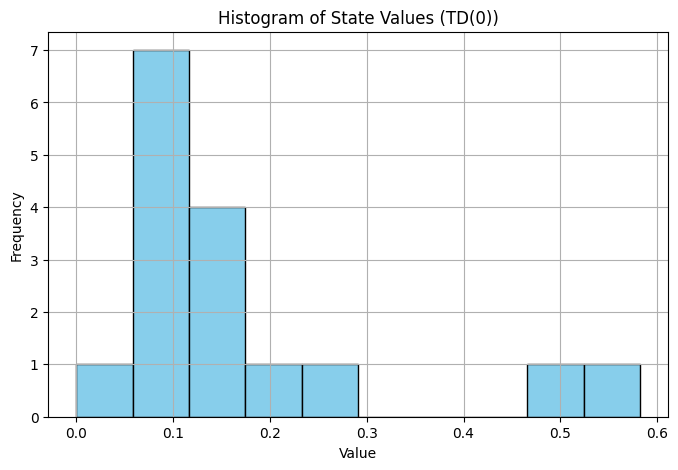

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gridworld configuration
GRID_SIZE = 4
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_TO_DELTA = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
GAMMA = 0.9
ALPHA = 0.1
EPISODES = 5000

NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = len(ACTIONS)

# Convert state index to (x, y) coordinates
def state_to_xy(s):
    return divmod(s, GRID_SIZE)

# Convert (x, y) coordinates to state index
def xy_to_state(x, y):
    return x * GRID_SIZE + y

# Terminal state setup
GOAL_STATE = xy_to_state(0, 0)
REWARDS = np.zeros(NUM_STATES)
REWARDS[GOAL_STATE] = 1.0
TERMINAL_STATES = [GOAL_STATE]

# Environment dynamics
def get_next_state(s, a):
    if s in TERMINAL_STATES:
        return s
    x, y = state_to_xy(s)
    dx, dy = ACTION_TO_DELTA[a]
    nx, ny = np.clip(x + dx, 0, GRID_SIZE - 1), np.clip(y + dy, 0, GRID_SIZE - 1)
    return xy_to_state(nx, ny)

# TD(0) learning with random policy
def td_learning():
    V = np.zeros(NUM_STATES)
    for episode in range(EPISODES):
        s = np.random.randint(NUM_STATES)
        while s not in TERMINAL_STATES:
            a = np.random.choice(ACTIONS)
            s_ = get_next_state(s, a)
            r = REWARDS[s_]
            V[s] += ALPHA * (r + GAMMA * V[s_] - V[s])
            s = s_
    return V

# Plot histogram of value function
def plot_value_histogram(V, title="Histogram of State Values (TD(0))"):
    plt.figure(figsize=(8, 5))
    plt.hist(V, bins=10, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Run TD learning and plot histogram
V_td = td_learning()
plot_value_histogram(V_td)

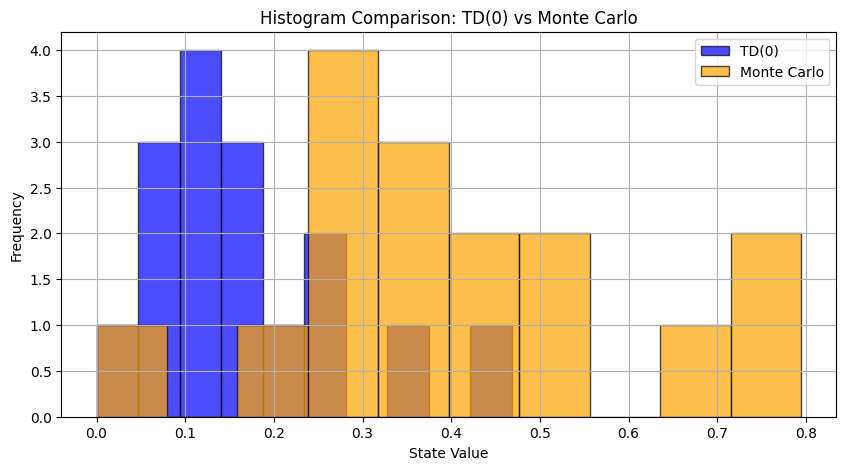

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Gridworld configuration
GRID_SIZE = 4
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_TO_DELTA = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
GAMMA = 0.9
ALPHA = 0.1
EPISODES = 5000

NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = len(ACTIONS)

# Coordinate conversion helpers
def state_to_xy(s):
    return divmod(s, GRID_SIZE)

def xy_to_state(x, y):
    return x * GRID_SIZE + y

# Terminal state and rewards
GOAL_STATE = xy_to_state(0, 0)
REWARDS = np.zeros(NUM_STATES)
REWARDS[GOAL_STATE] = 1.0
TERMINAL_STATES = [GOAL_STATE]

# Transition dynamics
def get_next_state(s, a):
    if s in TERMINAL_STATES:
        return s
    x, y = state_to_xy(s)
    dx, dy = ACTION_TO_DELTA[a]
    nx, ny = np.clip(x + dx, 0, GRID_SIZE - 1), np.clip(y + dy, 0, GRID_SIZE - 1)
    return xy_to_state(nx, ny)

# TD(0) prediction with random policy
def td_learning():
    V = np.zeros(NUM_STATES)
    for episode in range(EPISODES):
        s = np.random.randint(NUM_STATES)
        while s not in TERMINAL_STATES:
            a = np.random.choice(ACTIONS)
            s_ = get_next_state(s, a)
            r = REWARDS[s_]
            V[s] += ALPHA * (r + GAMMA * V[s_] - V[s])
            s = s_
    return V

# Monte Carlo prediction with first-visit sampling
def mc_prediction(num_episodes=5000):
    V = np.zeros(NUM_STATES)
    returns_sum = np.zeros(NUM_STATES)
    returns_count = np.zeros(NUM_STATES)

    for episode in range(num_episodes):
        s = np.random.randint(NUM_STATES)
        episode_states, episode_rewards = [], []

        # Generate episode
        while s not in TERMINAL_STATES:
            episode_states.append(s)
            a = np.random.choice(ACTIONS)
            s_ = get_next_state(s, a)
            r = REWARDS[s_]
            episode_rewards.append(r)
            s = s_

        G = 0
        visited = set()
        for t in reversed(range(len(episode_states))):
            s_t = episode_states[t]
            G = GAMMA * G + episode_rewards[t]
            if s_t not in visited:
                returns_sum[s_t] += G
                returns_count[s_t] += 1
                V[s_t] = returns_sum[s_t] / returns_count[s_t]
                visited.add(s_t)
    return V

# Histogram comparison
def compare_td_mc_histograms(V_td, V_mc):
    plt.figure(figsize=(10, 5))
    plt.hist(V_td, bins=10, alpha=0.7, label='TD(0)', color='blue', edgecolor='black')
    plt.hist(V_mc, bins=10, alpha=0.7, label='Monte Carlo', color='orange', edgecolor='black')
    plt.title("Histogram Comparison: TD(0) vs Monte Carlo")
    plt.xlabel("State Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run both algorithms and compare
V_td = td_learning()
V_mc = mc_prediction()
compare_td_mc_histograms(V_td, V_mc)

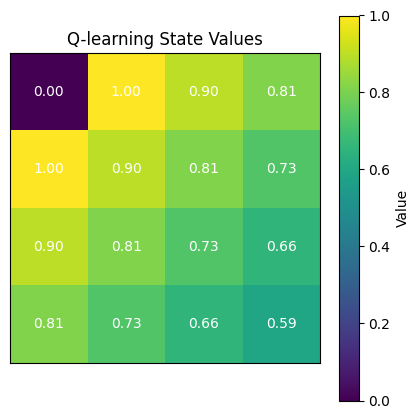

In [5]:
# q learning gridworld
import numpy as np
import matplotlib.pyplot as plt

# Gridworld setup
GRID_SIZE = 4
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_TO_DELTA = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = len(ACTIONS)

# Parameters
GAMMA = 0.9
ALPHA = 0.1
EPSILON = 0.1
EPISODES = 5000

# Coordinate helpers
def state_to_xy(s):
    return divmod(s, GRID_SIZE)

def xy_to_state(x, y):
    return x * GRID_SIZE + y

# Reward and terminal state
GOAL_STATE = xy_to_state(0, 0)
REWARDS = np.zeros(NUM_STATES)
REWARDS[GOAL_STATE] = 1.0
TERMINAL_STATES = [GOAL_STATE]

# Transition dynamics
def get_next_state(s, a):
    if s in TERMINAL_STATES:
        return s
    x, y = state_to_xy(s)
    dx, dy = ACTION_TO_DELTA[a]
    nx, ny = np.clip(x + dx, 0, GRID_SIZE - 1), np.clip(y + dy, 0, GRID_SIZE - 1)
    return xy_to_state(nx, ny)

# Epsilon-greedy policy
def epsilon_greedy_policy(Q, s):
    if np.random.rand() < EPSILON:
        return np.random.randint(NUM_ACTIONS)
    return np.argmax(Q[s])

# Q-learning algorithm
def q_learning():
    Q = np.zeros((NUM_STATES, NUM_ACTIONS))
    for episode in range(EPISODES):
        s = np.random.randint(NUM_STATES)
        while s not in TERMINAL_STATES:
            a = epsilon_greedy_policy(Q, s)
            a_str = ACTIONS[a]
            s_ = get_next_state(s, a_str)
            r = REWARDS[s_]
            Q[s, a] += ALPHA * (r + GAMMA * np.max(Q[s_]) - Q[s, a])
            s = s_
    return Q

# Heatmap visualization of state values
def plot_value_heatmap(V, title="Q-learning State Values"):
    plt.figure(figsize=(5, 5))
    grid = V.reshape(GRID_SIZE, GRID_SIZE)
    plt.imshow(grid, cmap='viridis', origin='upper')
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            plt.text(j, i, f"{grid[i, j]:.2f}", ha='center', va='center', color='white')
    plt.title(title)
    plt.colorbar(label="Value")
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Run Q-learning
Q = q_learning()
V_q = np.max(Q, axis=1)
plot_value_heatmap(V_q)